# Auto Encoder

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

In [2]:
# Fashion MNIST 데이터셋 로드
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
# 인코더 모델 정의
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# 디코더 모델 정의
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 오토인코더 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 학습 : CPU 약 3분 소요
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 0.3417 - val_loss: 0.2726
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.2691 - val_loss: 0.2659
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.2622 - val_loss: 0.2609
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.2582 - val_loss: 0.2583
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - loss: 0.2557 - val_loss: 0.2567


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


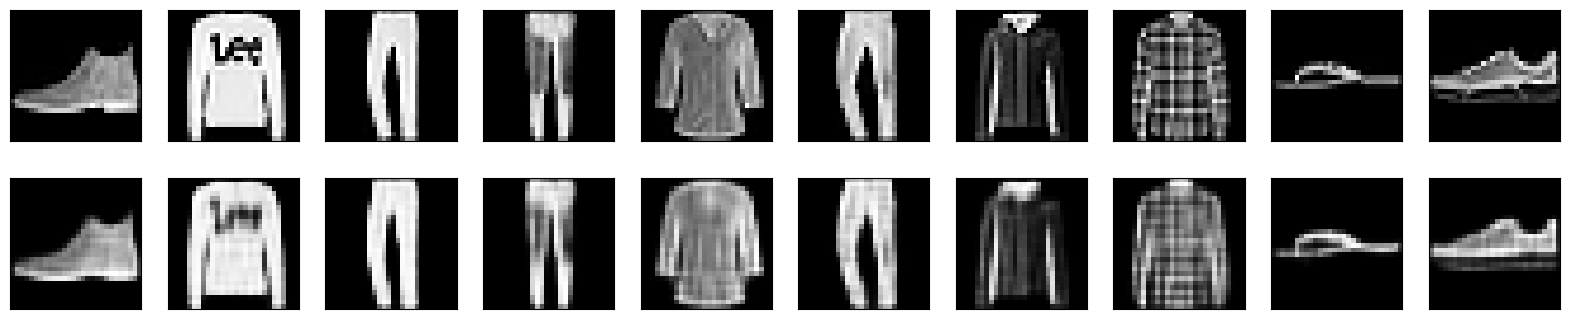

In [5]:
# 결과 시각화
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Cats and Dogs 데이터 셋 사용  Autoencoder

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# 데이터 로드
(x_train, _), (x_test, _) = cifar10.load_data()

# 데이터 전처리 (0~1 사이 값으로 정규화)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten 및 Reshape 레이어를 위한 이미지 크기
img_rows, img_cols, img_channels = x_train.shape[1:]
flat_dim = img_rows * img_cols * img_channels

# 인코더 모델 정의
input_img = Input(shape=(img_rows, img_cols, img_channels))
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)  # 잠재 표현의 크기 조정

# 디코더 모델 정의
decoded = Dense(flat_dim, activation='sigmoid')(encoded)
decoded = Reshape((img_rows, img_cols, img_channels))(decoded)

# Autoencoder 모델 생성
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3072)                │         396,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 789,632 (3.01 MB)

 Trainable params: 789,632 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# 모델 학습 : CPU 약 7분 소요
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.6464 - val_loss: 0.6089
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.6047 - val_loss: 0.5963
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.5939 - val_loss: 0.5897
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.5882 - val_loss: 0.5857
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5842 - val_loss: 0.5838
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5825 - val_loss: 0.5827
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5821 - val_loss: 0.5821
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5807 - val_loss: 0.5822
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5809 - val_loss: 0.5833
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5808 - val_loss: 0.5811
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5804 - val_loss: 0.5828
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


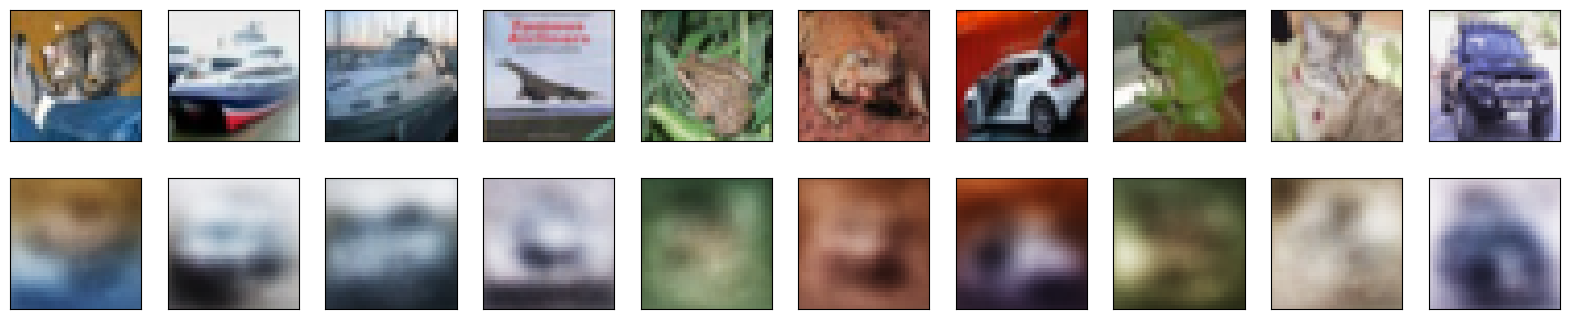

In [3]:
# 이미지 복원 및 시각화
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(img_rows, img_cols, img_channels))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(img_rows, img_cols, img_channels))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## VAE

--> 새 노트북 파일에서 다시 구현할것

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
latent_dim = 2  # 잠재 공간의 차원
input_shape = (28, 28, 1)  # 입력 이미지 크기 (MNIST 데이터셋 사용)
batch_size = 128

# 인코더 모델
def build_encoder(input_shape, latent_dim):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    return tf.keras.Model(inputs, [z_mean, z_log_var], name="encoder")

# 샘플링 함수 정의 (reparameterization trick)
def sampling(z_mean, z_log_var):
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# 디코더 모델
def build_decoder(latent_dim, original_shape):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
    
    return tf.keras.Model(latent_inputs, outputs, name="decoder")

# VAE 모델 정의
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = sampling(z_mean, z_log_var)
        reconstructed = self.decoder(z)
        
        # VAE loss 계산
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, reconstructed))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

# 데이터 로드 및 전처리 (MNIST 데이터셋 사용)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

# 모델 생성
encoder = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, input_shape)
vae = VAE(encoder, decoder)

# 모델 컴파일 및 학습
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(x_train, x_train, epochs=20, batch_size=batch_size, validation_data=(x_test, x_test))

# 잠재 공간에서 샘플링하여 새로운 이미지 생성
def plot_latent_images(decoder, n, digit_size=28):
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

# 잠재 공간에서 샘플링하여 이미지 생성
plot_latent_images(decoder, 10)


Epoch 1/20
146/469 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 55.8863


KeyboardInterrupt



In [9]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# 하이퍼파라미터 설정
latent_dim = 64  # 잠재 공간의 차원
input_shape = (32, 32, 3)  # CIFAR-10 이미지 크기
batch_size = 128

# 인코더 모델
def build_encoder(input_shape, latent_dim):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    return tf.keras.Model(inputs, [z_mean, z_log_var], name="encoder")

# 샘플링 함수 정의 (reparameterization trick)
def sampling(z_mean, z_log_var):
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# 디코더 모델
def build_decoder(latent_dim, original_shape):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(4 * 4 * 128, activation='relu')(latent_inputs)
    x = layers.Reshape((4, 4, 128))(x)
    x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
    
    return tf.keras.Model(latent_inputs, outputs, name="decoder")

# VAE 모델 정의
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = sampling(z_mean, z_log_var)
        reconstructed = self.decoder(z)
        
        # VAE loss 계산
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, reconstructed))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

# 데이터 로드 및 전처리 (CIFAR-10 데이터셋 사용)
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 모델 생성
encoder = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, input_shape)
vae = VAE(encoder, decoder)

# 모델 컴파일 및 학습
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(x_train, x_train, epochs=50, batch_size=batch_size, validation_data=(x_test, x_test))



In [ ]:
# 잠재 공간에서 샘플링하여 새로운 이미지 생성
print(latent_dim)
def plot_latent_images(decoder, n, digit_size=32):
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n, 3))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]] * latent_dim)  # 여기서 latent_dim 크기의 벡터로 확장
            print(z_sample.shape)
            z_sample = z_sample.reshape(-1, latent_dim)
            print(z_sample.shape)
            x_decoded = decoder.predict(z_sample)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = x_decoded[0]

    plt.figure(figsize=(10, 10))
    plt.imshow(figure)
    plt.show()

# 잠재 공간에서 샘플링하여 이미지 생성
plot_latent_images(decoder, 10)
